In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import timedelta

from earlywarningsignals.signals import EWarningSpecific, EWarningSpecificDynamic, EWarningDNM, EWarningDNMDynamic
from earlywarningsignals.display import chart, map

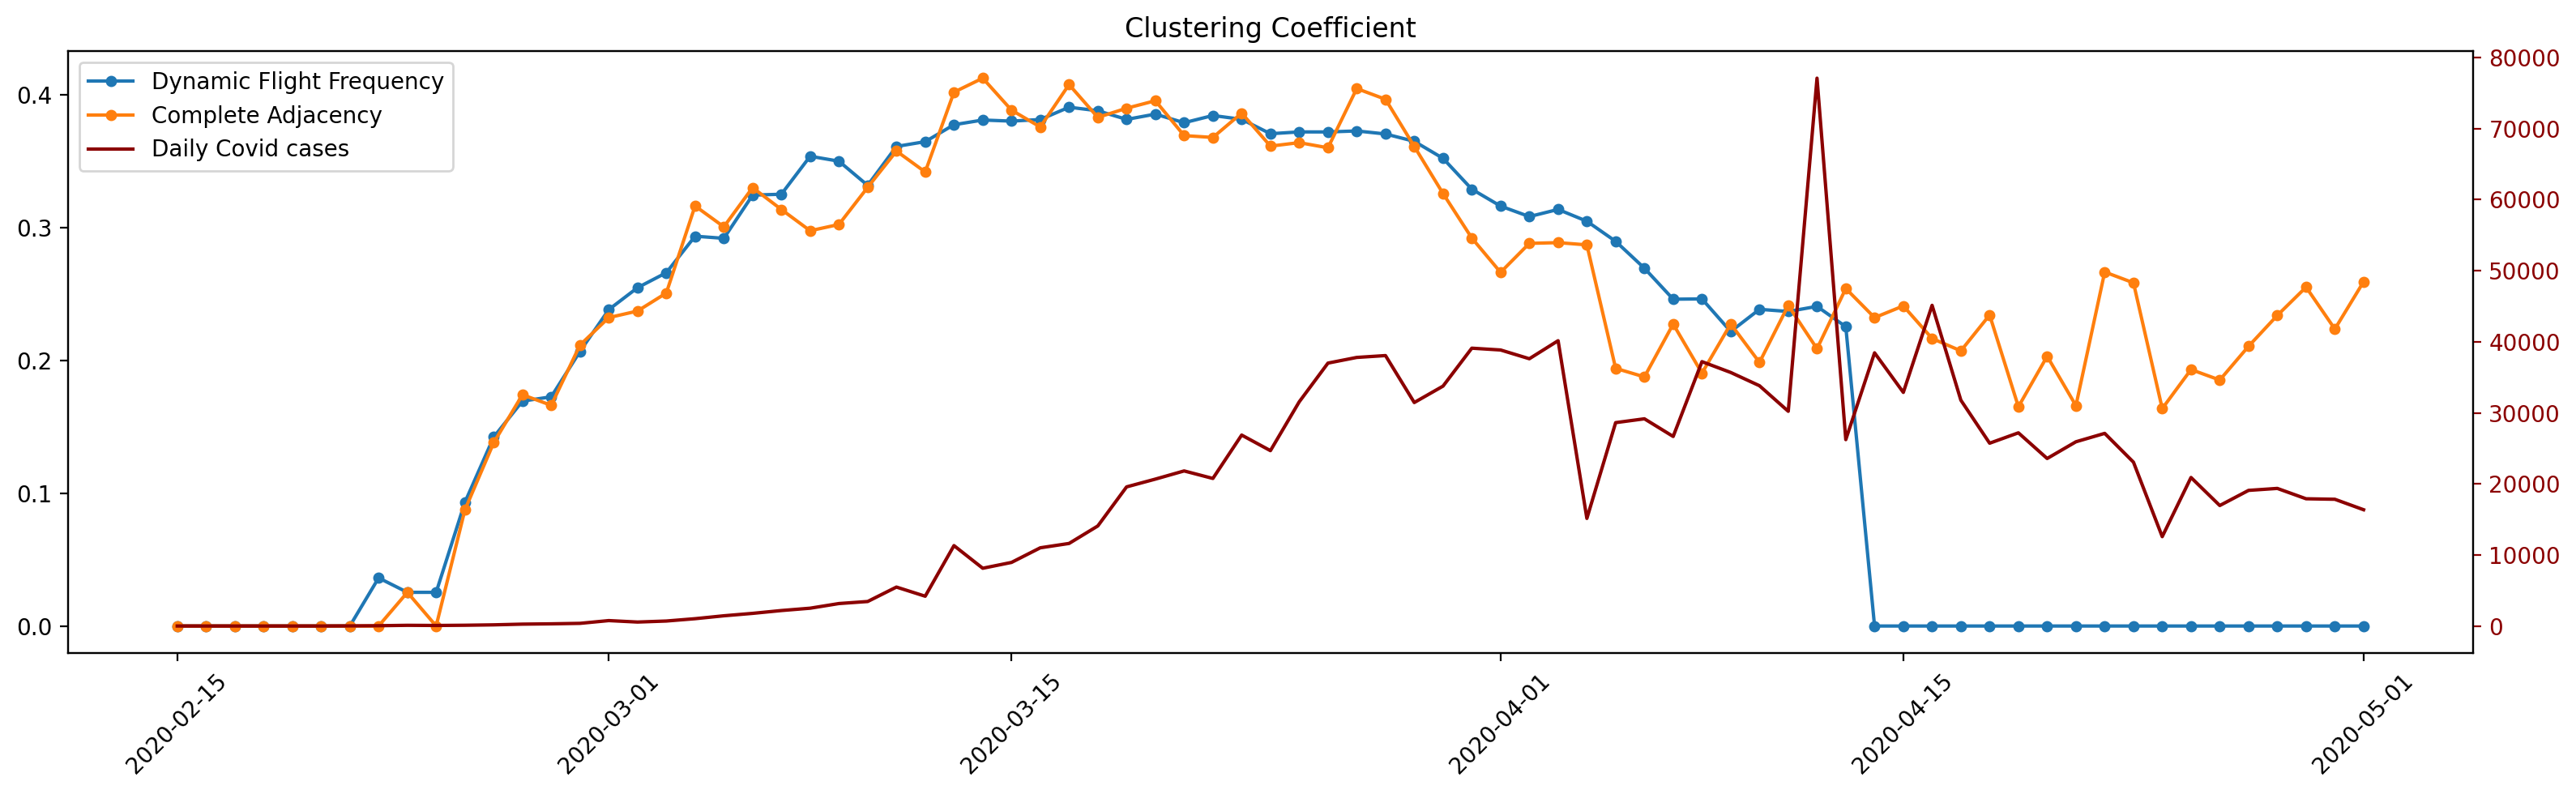

In [13]:
ew = EWarningSpecificDynamic(start_date=pd.to_datetime('2020-02-15', format='%Y-%m-%d'), cumulative_data=False, square_root_data=False, progress_bar=False, threshold=0.000001)
ew.check_windows()
clustering_0 = ew.clustering_coefficient()

ew = EWarningSpecific(start_date=pd.to_datetime('2020-02-15', format='%Y-%m-%d'), cumulative_data=False, square_root_data=False, progress_bar=False)
ew.check_windows()
clustering_1 = ew.clustering_coefficient()

new_cases = np.sum(ew.data[:, ew.window_size - 1:], axis=0)
interval = np.arange(np.datetime64(ew.start_date), np.datetime64(ew.end_date + timedelta(days=1)), dtype='datetime64[D]')

chart.plot_chat(series=np.stack((clustering_0, clustering_1), axis=0), series_2=new_cases, interval=interval,
                fold_changes=[-1, -1], fold_steps=[-1, -1],
                title='Clustering Coefficient',
                legends=['Dynamic Flight Frequency','Complete Adjacency'], legends_2='Daily Covid cases', legend_position='upper left')
plt.show()

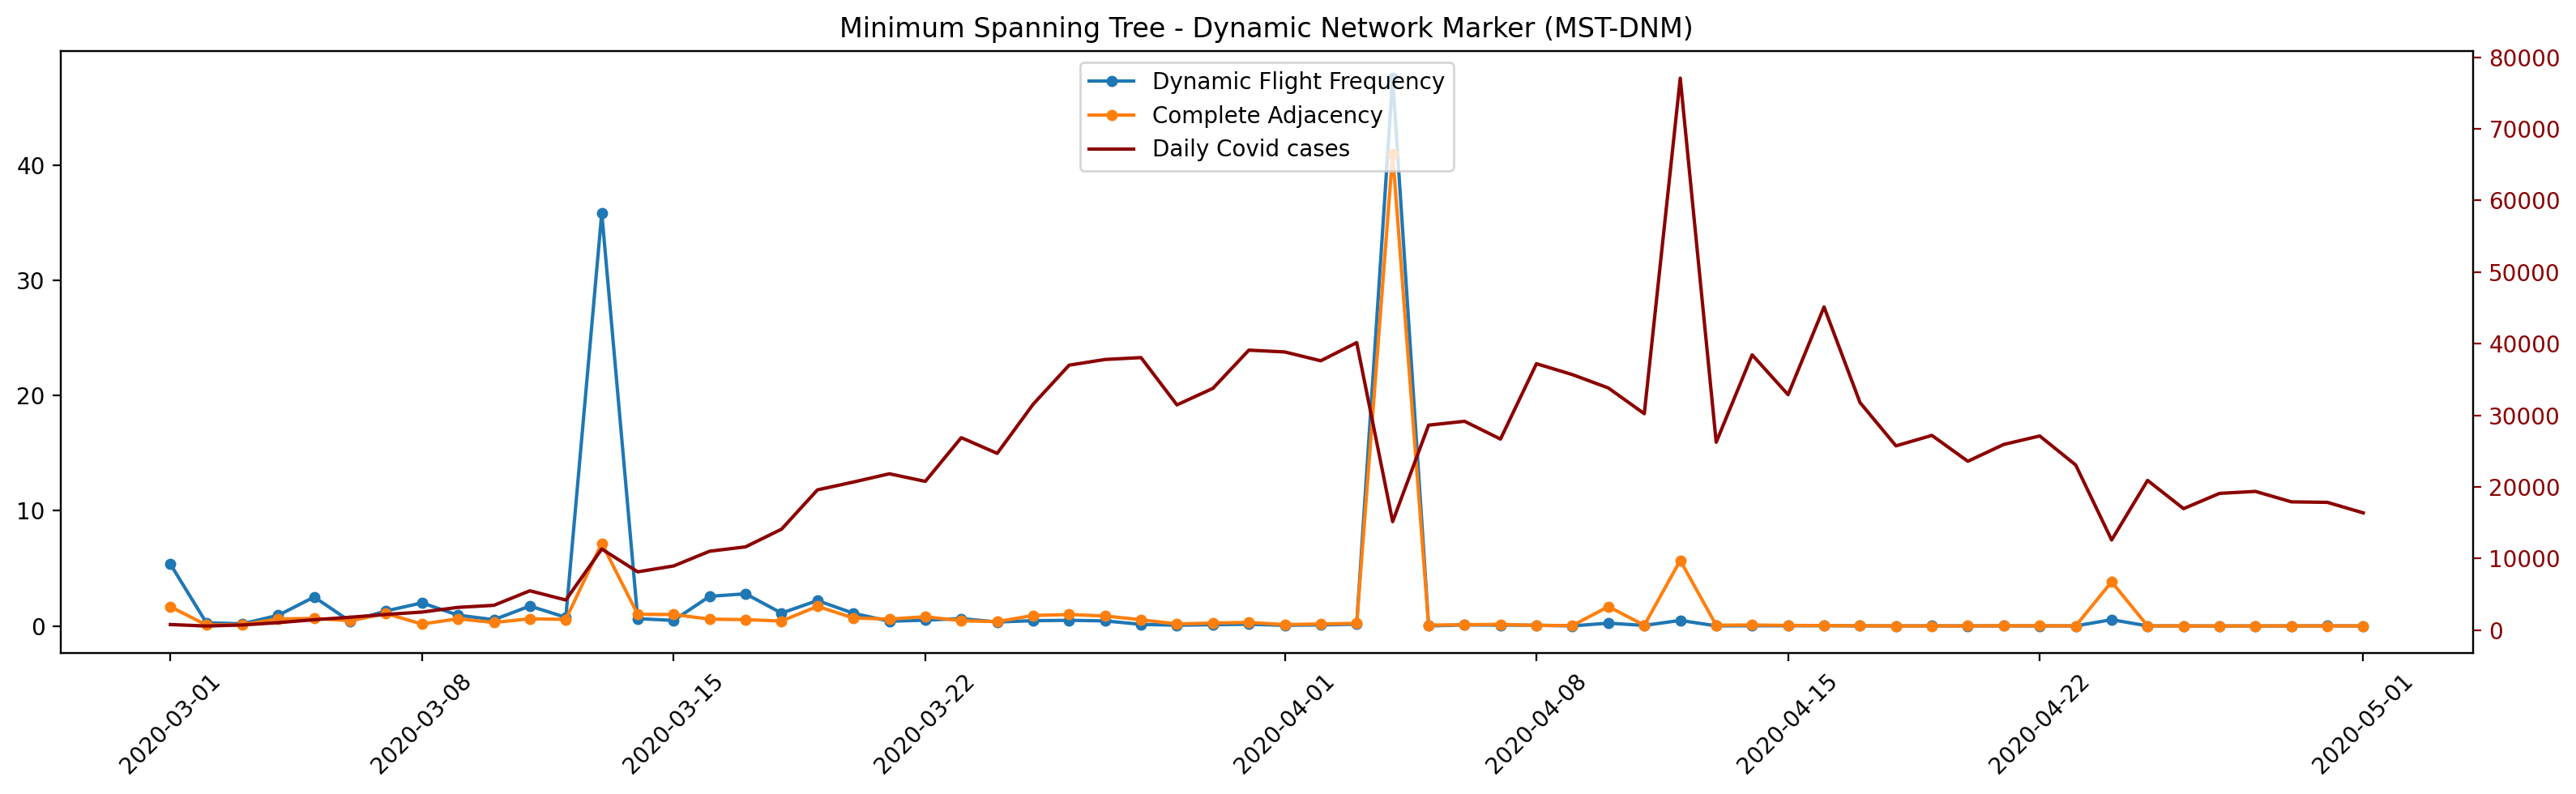

In [24]:
ew = EWarningDNMDynamic(start_date=pd.to_datetime('2020-03-01', format='%Y-%m-%d'), cumulative_data=False, window_size=0, progress_bar=False)
ew.check_windows()
mst_0 = ew.mst_dnm() * 5000

ew = EWarningDNM(start_date=pd.to_datetime('2020-03-01', format='%Y-%m-%d'), cumulative_data=False, window_size=0, progress_bar=False)
ew.check_windows()
mst_1 = ew.mst_dnm()

new_cases = np.sum(ew.data[:, 2:], axis=0)
interval = np.arange(np.datetime64(ew.start_date), np.datetime64(ew.end_date + timedelta(days=1)), dtype='datetime64[D]')

chart.plot_chat(series=np.stack((mst_0, mst_1), axis=0), series_2=new_cases, interval=interval,
                fold_changes=[-1, -1], fold_steps=[-1, -1],
                title='Minimum Spanning Tree - Dynamic Network Marker (MST-DNM)',
                legends=['Dynamic Flight Frequency', 'Complete Adjacency'], legends_2='Daily Covid cases')
plt.show()

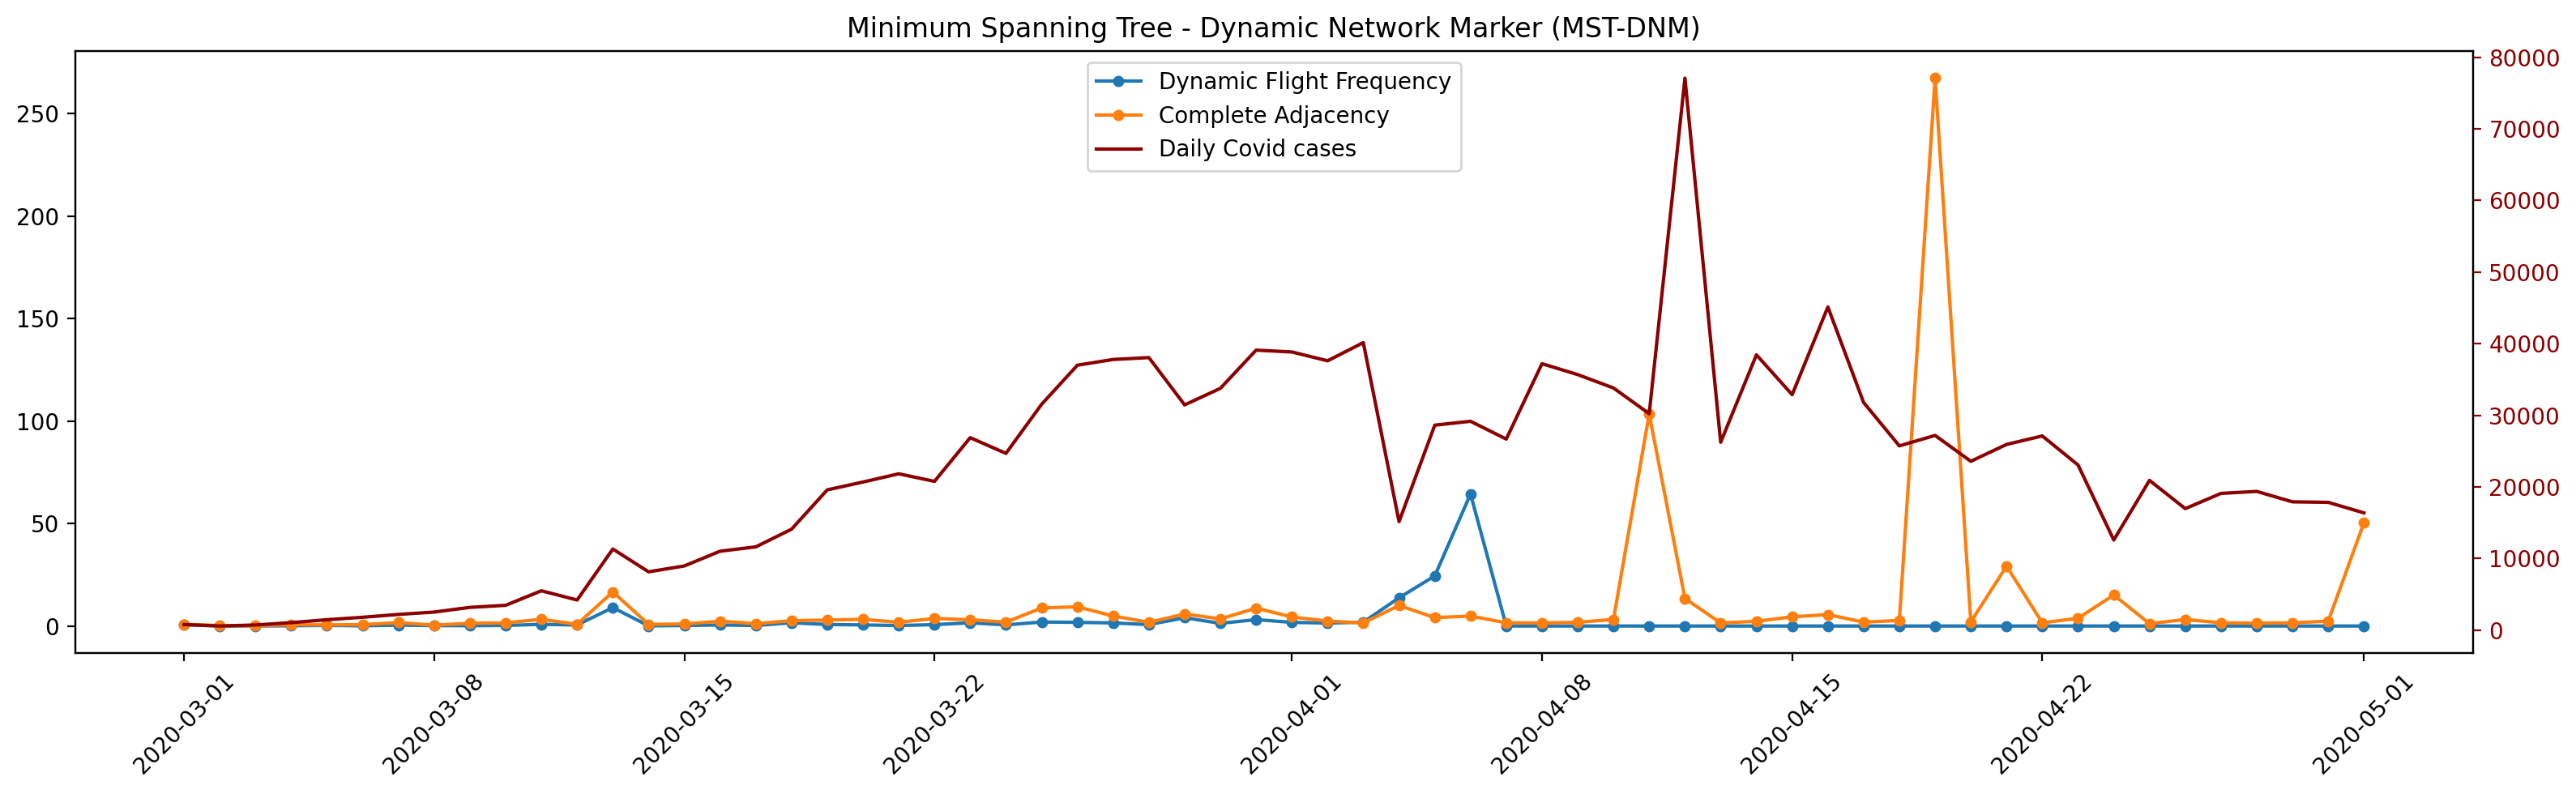

In [25]:
ew = EWarningDNMDynamic(start_date=pd.to_datetime('2020-03-01', format='%Y-%m-%d'), cumulative_data=False, window_size=7, progress_bar=False)
ew.check_windows()
mst_0 = ew.mst_dnm() * 1000

ew = EWarningDNM(start_date=pd.to_datetime('2020-03-01', format='%Y-%m-%d'), cumulative_data=False, window_size=7, progress_bar=False)
ew.check_windows()
mst_1 = ew.mst_dnm()

new_cases = np.sum(ew.data[:, ew.window_size:], axis=0)
interval = np.arange(np.datetime64(ew.start_date), np.datetime64(ew.end_date + timedelta(days=1)), dtype='datetime64[D]')

chart.plot_chat(series=np.stack((mst_0, mst_1), axis=0), series_2=new_cases, interval=interval,
                fold_changes=[-1, -1], fold_steps=[-1, -1],
                title='Minimum Spanning Tree - Dynamic Network Marker (MST-DNM)',
                legends=['Dynamic Flight Frequency', 'Complete Adjacency'], legends_2='Daily Covid cases')
plt.show()